# **MNIST CNN with VGG16**

## Start

In [0]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Step1: import packages

In [0]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.optimizers import SGD
from keras.utils import np_utils
import matplotlib.pyplot as plt

Using TensorFlow backend.


### Step2:load the data

In [0]:
PATH = "/content/drive/My Drive/Colab Notebooks/Tugas 2 Deep Learning/Dataset"
train = pd.read_csv(os.path.join(PATH,'train.csv'))
test = pd.read_csv(os.path.join(PATH,'test.csv'))
sample = pd.read_csv(os.path.join(PATH,'sample_submission.csv'))

### Step3: Process the data

In [0]:
y = train.label
X = train.drop('label', axis=1)

In [0]:
X_train = X.values/255
X_train = X_train.reshape(-1,28,28,1)     # 这地方一定要用（-1，28，28，1）
y_train = np_utils.to_categorical(y)

In [0]:
X_test = test.values / 255
X_test = X_test.reshape(-1, 28, 28, 1)

### Step4:Define the VGG net

In [0]:
def myModel(weights_path = None):
    model = Sequential()
    
    model.add(ZeroPadding2D((1,1), input_shape=(28,28,1)))
    model.add(Conv2D(64, (3,3),padding='same', activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(64, (3,3),padding='same', activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(128, kernel_size=3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(128, kernel_size=3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(256, kernel_size=3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(256, kernel_size=3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(256, kernel_size=3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, kernel_size=3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, kernel_size=3, activation='relu'))
    model.add(ZeroPadding2D((1,1)))
    model.add(Conv2D(512, kernel_size=3, activation='relu'))
    model.add(MaxPooling2D((2,2), strides=(2,2)))
    
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    
    return model

In [0]:
VGG = myModel()
optimizer = SGD()
VGG.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.




### Step5:Train the net

#### Epoch 50

In [0]:
history = VGG.fit(X_train,y_train,batch_size=64, epochs=50, validation_split=0.2,verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 33600 samples, validate on 8400 samples
Epoch 1/50





33600/33600 [==============================] - 39s 1ms/step - loss: 2.3001 - acc: 0.1123 - val_loss: 2.2964 - val_acc: 0.1131
Epoch 2/50
33600/33600 [==============================] - 23s 672us/step - loss: 2.2916 - acc: 0.1196 - val_loss: 2.2762 - val_acc: 0.1881
Epoch 3/50
33600/33600 [==============================] - 23s 677us/step - loss: 1.8493 - acc: 0.4068 - val_loss: 0.8457 - val_acc: 0.6979
Epoch 4/50
33600/33600 [==============================] - 23s 686us/step - loss: 0.4025 - acc: 0.8682 - val_loss: 0.1890 - val_acc: 0.9371
Epoch 5/50
33600/33600 [==============================] - 24s 700us/step - loss: 0.1912 - acc: 0.9389 - val_loss: 0.1305 - val_acc: 0.9583
Epoch 6/50
33600/33600 [==============================] - 23s 695us/step - loss: 0.1350 - acc: 0.9577 - val_loss: 0.0996 - val_acc: 0.9675
Epoch 7/50
33600/

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


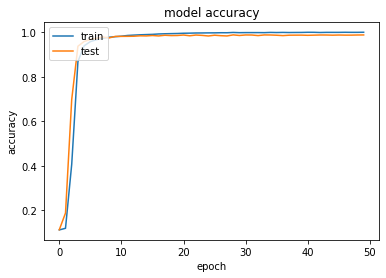

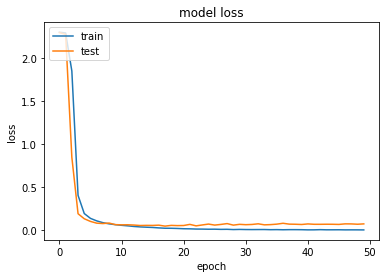

In [0]:
# show the accuracy and loss 
print(history.history.keys())
# accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##### Step6:Predict (50 Epoch)

In [0]:
ret = VGG.predict(X_test)

In [0]:
results = np.argmax(ret,axis = 1)

##### Step7:Submit (50 Epoch)

In [0]:
df = {'ImageId':sample['ImageId'],
     'Label':results }

submission = pd.DataFrame(df)

In [0]:
submission.to_csv('submission.csv', index=False)

#### Epoch 100

In [0]:
history = VGG.fit(X_train,y_train,batch_size=64, epochs=100, validation_split=0.2,verbose=1)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 33600 samples, validate on 8400 samples
Epoch 1/100





33600/33600 [==============================] - 30s 882us/step - loss: 2.3001 - acc: 0.1126 - val_loss: 2.2967 - val_acc: 0.1131
Epoch 2/100
33600/33600 [==============================] - 15s 438us/step - loss: 2.2923 - acc: 0.1152 - val_loss: 2.2790 - val_acc: 0.1592
Epoch 3/100
33600/33600 [==============================] - 15s 436us/step - loss: 1.9194 - acc: 0.3932 - val_loss: 0.7096 - val_acc: 0.7554
Epoch 4/100
33600/33600 [==============================] - 15s 433us/step - loss: 0.4731 - acc: 0.8413 - val_loss: 0.2100 - val_acc: 0.9326
Epoch 5/100
33600/33600 [==============================] - 15s 436us/step - loss: 0.2105 - acc: 0.9317 - val_loss: 0.1314 - val_acc: 0.9562
Epoch 6/100
33600/33600 [==============================] - 15s 441us/step - loss: 0.1422 - acc: 0.9544 - val_loss: 0.1057 - val_acc: 0.9650
Epoch 7/1

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


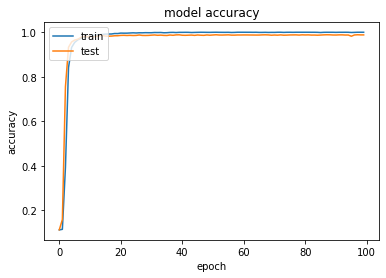

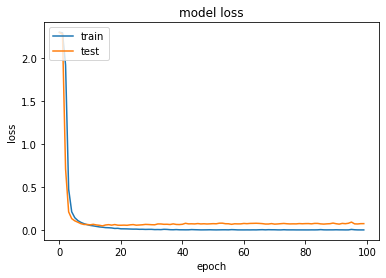

In [0]:
# show the accuracy and loss 
print(history.history.keys())
# accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

##### Step6:Predict (100 epoch)

In [0]:
ret = VGG.predict(X_test)

In [0]:
results = np.argmax(ret,axis = 1)

##### Step7:Submit (100 epoch)

In [0]:
df = {'ImageId':sample['ImageId'],
     'Label':results }

submission = pd.DataFrame(df)

In [0]:
submission.to_csv('submission.csv', index=False)